# Proyecto: Eliminación de Ruido con Muestreo de Gibbs
## Martiñón Luna Jonathan José
## Licenciatura en Ciencia de Datos
## Semestre 2021 - II
Basado en:
- [towardsdatascience.com](https://towardsdatascience.com/image-denoising-with-gibbs-sampling-mcmc-concepts-and-code-implementation-11d42a90e153)
- [Github](https://github.com/VXU1230/Medium-Tutorials/tree/master/mcmc_gibbs)

# Librerías

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Funciones

In [4]:
def denoise_image(filename, burn_in_steps, total_samples, logfile):
    posterior = get_posterior(filename, burn_in_steps, total_samples, logfile=logfile)
    denoised = np.zeros(posterior.shape, dtype=np.float64)
    denoised[posterior > 0.5] = 1
    return denoised[1:-1, 1:-1]

In [5]:
def load_image(filename):
    my_img = plt.imread(filename)
    img_gray = np.dot(my_img[..., :3], [0.2989, 0.5870, 0.1140])
    img_gray = np.where(img_gray > 0.5, 1, -1)
    img_padded = np.zeros([img_gray.shape[0] + 2, img_gray.shape[1] + 2])
    img_padded[1:-1, 1:-1] = img_gray
    return img_padded

In [6]:
def get_posterior(filename, burn_in_steps, total_samples, logfile):
    X = load_image(filename)
    posterior = np.zeros(X.shape)
    print(X.shape)
    Y = np.random.choice([1, -1], size=X.shape)
    energy_list = list()
    for step in range(burn_in_steps + total_samples):
        for i in range(1, Y.shape[0]-1):
            for j in range(1, Y.shape[1]-1):
                y = sample_y(i, j, Y, X)
                Y[i, j] = y
                if y == 1 and step >= burn_in_steps:
                    posterior[i, j] += 1
        energy = -np.sum(np.multiply(Y, X))*ITA-(np.sum(np.multiply(Y[:-1], Y[1:]))+np.sum(np.multiply(Y[:, :-1], Y[:, 1:])))*BETA
        if step < burn_in_steps:
            energy_list.append(str(step) + "\t" + str(energy) + "\tB")
        else:
            energy_list.append(str(step) + "\t" + str(energy) + "\tS")
    posterior = posterior / total_samples

    file = open(logfile, 'w')
    for element in energy_list:
        file.writelines(element)
        file.write('\n')
    file.close()
    return posterior

In [7]:
def sample_y(i, j, Y, X):
    markov_blanket = [Y[i - 1, j], Y[i, j - 1], Y[i, j + 1], Y[i + 1, j], X[i, j]]
    w = ITA * markov_blanket[-1] + BETA * sum(markov_blanket[:4])
    prob = 1 / (1 + math.exp(-2*w))
    return (np.random.rand() < prob) * 2 - 1

In [8]:
def plot_energy(filename):
    x = np.genfromtxt(filename, dtype=None, encoding='utf8')
    its, energies, phases = zip(*x)
    its = np.asarray(its)
    energies = np.asarray(energies)
    phases = np.asarray(phases)
    burn_mask = (phases == 'B')
    samp_mask = (phases == 'S')
    assert np.sum(burn_mask) + np.sum(samp_mask) == len(x), 'Found bad phase'
    its_burn, energies_burn = its[burn_mask], energies[burn_mask]
    its_samp, energies_samp = its[samp_mask], energies[samp_mask]
    p1, = plt.plot(its_burn, energies_burn, 'r')
    p2, = plt.plot(its_samp, energies_samp, 'b')
    plt.title("energy")
    plt.xlabel('iteration number')
    plt.ylabel('energy')
    plt.legend([p1, p2], ['burn in', 'sampling'])
    plt.savefig('%s.png' % filename)
    plt.close()

In [9]:
def save_image(denoised_image):
    plt.imshow(denoised_image, cmap='gray')
    plt.title("denoised image")
    plt.savefig('output/denoise_image.png')
    plt.close()

# Lectura de Datos

In [24]:
from time import time

In [76]:
ITA = 1
BETA = 1
total_samples = 1000
burn_in_steps = 100

logfile = "output/log_energy.txt"

start = time()

denoised_img = denoise_image("data/img_noisy.png", burn_in_steps=burn_in_steps,
                             total_samples=total_samples, logfile=logfile)
plot_energy(logfile)
save_image(denoised_img)

print("Tardó: ",start-time())

(302, 668)
Tardó:  -1917.990450143814


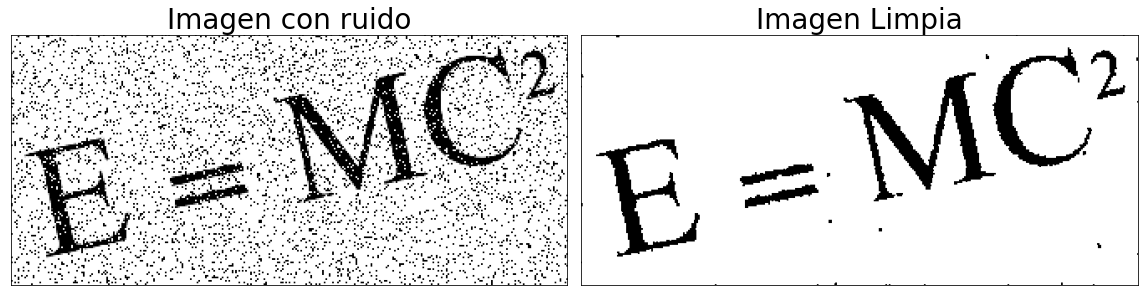

In [94]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title("Imagen con ruido", fontsize = 28)
plt.imshow(my_img)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.title("Imagen Limpia",fontsize = 28)
plt.imshow(denoised_img,cmap="gray")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

# Análisis

In [60]:
my_img = plt.imread("data/img_noisy.png")

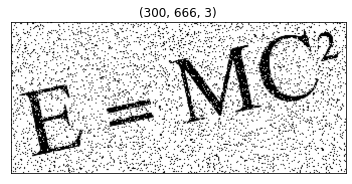

In [61]:
plt.imshow(my_img)
plt.title(my_img.shape)
plt.xticks([])
plt.yticks([])
plt.show()

In [62]:
img_gray = np.dot(my_img[..., :3], [0.2989, 0.5870, 0.1140])

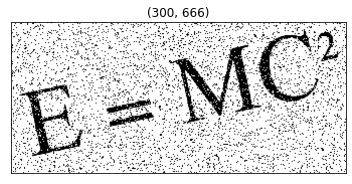

In [63]:
plt.imshow(img_gray, cmap="gray")
plt.title(img_gray.shape)
plt.xticks([])
plt.yticks([])
plt.show()

In [64]:
img_gray = np.where(img_gray > 0.5, 1, -1)

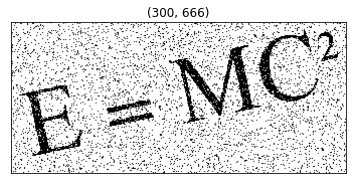

In [65]:
plt.imshow(img_gray, cmap="gray")
plt.title(img_gray.shape)
plt.xticks([])
plt.yticks([])
plt.show()

In [72]:
img_padded = np.zeros([img_gray.shape[0] + 2, img_gray.shape[1] + 2])

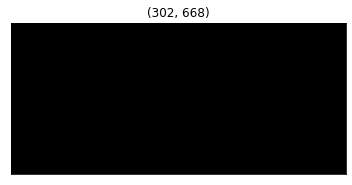

In [73]:
plt.imshow(img_padded, cmap="gray")
plt.title(img_padded.shape)
plt.xticks([])
plt.yticks([])
plt.show()

In [74]:
img_padded[1:-1, 1:-1] = img_gray

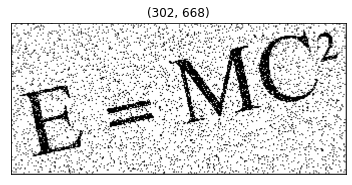

In [75]:
plt.imshow(img_padded, cmap="gray")
plt.title(img_padded.shape)
plt.xticks([])
plt.yticks([])
plt.show()

Comparamos los valores de la imagen inicial, contra la imagen final.

In [77]:
my_img

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [78]:
img_padded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Conclusiones